# 4 - Aggregation

After the halfway point, we switched to talking about how we can aggregate data in Pandas. We started a new notebook and imported our libraries as normal.

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

We encountered some issues with files being in the wrong place, but in this notebook I'm going to gloss over those and remove references. If you have those issues, please slack me!

Now, we will load in some data - our students data and our summarized orders data. We talked about how we can tell pandas that certain columns should be treated as our datetime column from week 2, allowing us to use dates effectively.

We tell it this information with the `parse_dates=['col1', 'col2']` argument in the `pd.read_csv()` function.

In [107]:
df_students = pd.read_csv('Desktop/pmbas/data/students.csv')

In [110]:
df_summarized_orders = pd.read_csv(
    'Desktop/pmbas/data/summarized_orders.csv', parse_dates=['DATE']
)

If you're feeling old-school and wanted to read it in without that and fix it up later, you can always do that with the `pd.to_datetime()` functionality we learned about last week.

In [ ]:
df_summarized_orders.DATE = pd.to_datetime(df_summarized_orders.DATE)

If your summarized orders columns did not look like mine, we couuld always change them using our methods of renaming columns.


In [109]:
df_summarized_orders.columns

Index(['RESTAURANT_LOCATION', 'DATE', 'NUM_ORDERS', 'PERC_DELIVERY'], dtype='object')

In [10]:
df_orders = pd.read_csv('Desktop/pmbas/data/orders3.csv', parse_dates=['DATETIME'])

Let's make sure this loaded in correctly by using `.info()` to check on our datatypes.

In [111]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2387224 entries, 0 to 2387223
Data columns (total 16 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ORDER_ID         object        
 1   DATETIME         datetime64[ns]
 2   RESTAURANT_ID    object        
 3   TYPE             object        
 4   DRINKS           float64       
 5   COOKIES          float64       
 6   MAIN             object        
 7   BASE             object        
 8   SIDE_1           object        
 9   SIDE_2           object        
 10  RESTAURANT_NAME  object        
 11  MAIN_NAME        object        
 12  BASE_NAME        object        
 13  SIDE_1_NAME      object        
 14  SIDE_2_NAME      object        
 15  IS_DELIVERY      bool          
dtypes: bool(1), datetime64[ns](1), float64(2), object(12)
memory usage: 275.5+ MB


# The Basics of Aggregation

If we wanted to find the average age of students by year, we have an existing way to do it - we could filter the dataframe for every year and find the mean. However, that would be, frankly, annoying. We saw how we could do it by changing the `YEAR == x` to different values of x, and running the below.


In [36]:
df_students[(df_students.YEAR == 4)].AGE.mean()

22.0

Instead, we can use the `groupby` function.

In [ ]:
df_students.groupby('YEAR').AGE.mean()

Let's break down this code:

- We start by applying groupby() to the whole df_students DataFrame
- We pass in YEAR to tell it that we want to separate the dataset into multiple groups by that column
- Then we select the AGE column as the one to do calculations over
- Then we apply the mean() function to find the average of that column

Notice the result isn't a table (it's a Series). We can use .reset_index() to turn it into a dataframe if we want:


In [48]:
df_students.groupby('YEAR').AGE.mean().reset_index()

,YEAR,AGE
0,1,18.2
1,2,20.0
2,3,20.0
3,4,22.0


And we can append a plot directly to that data.

<Axes: xlabel='YEAR'>

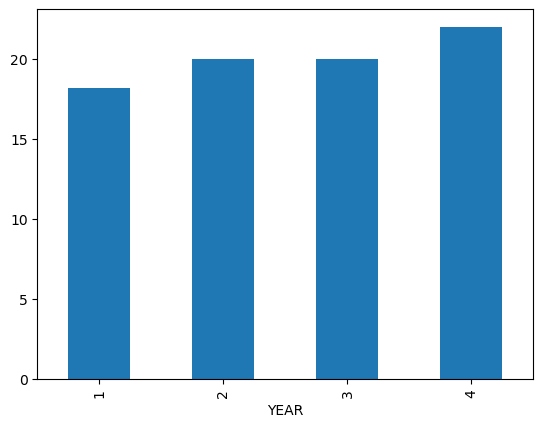

In [42]:
df_students.groupby('YEAR').AGE.mean().plot(kind='bar')

In [112]:
# We can also group by multiple columns.
# Note that we are passing a LIST, denoted by `[]`, to groupby, for multiple columns
df_students.groupby(['YEAR', 'HOME_STATE']).AGE.mean()

YEAR  HOME_STATE
1     FL            17.5
      NY            18.5
      PA            19.0
2     HI            19.0
      OK            21.0
3     NY            20.0
4     CA            22.0
Name: AGE, dtype: float64

Now we technically have something called a multi-level index, which is complicated, but we can reset the index to get out of it.

In [45]:
df_students.groupby( ['YEAR','HOME_STATE'] ).AGE.mean().reset_index()

,YEAR,HOME_STATE,AGE
0,1,FL,17.5
1,1,NY,18.5
2,1,PA,19.0
3,2,HI,19.0
4,2,OK,21.0
5,3,NY,20.0
6,4,CA,22.0


Alight - enough playing with our student dataset. Let's do this for real.

We had a challenge - find the average number of orders per restaurant.

In [49]:
df_summarized_orders.groupby('RESTAURANT_LOCATION').NUM_ORDERS.mean()

RESTAURANT_LOCATION
Bryant Park         871.436782
Columbia            687.150685
Flatiron            772.556164
Midtown             891.136986
NYU                1180.438356
Upper East Side     774.650704
Upper West Side     770.372603
Williamsburg        862.120548
Name: NUM_ORDERS, dtype: float64

We talked about how there are actually two answers for this question - one that only has the number of days that there are sales as the denominator and one that treats the full 365 day calendar as the denominator. They serve different purposes - one is more operational, and one is more financial.

In [54]:
df_summarized_orders[(df_summarized_orders['RESTAURANT_LOCATION'] == 'Bryant Park')].NUM_ORDERS.sum()/365

623.1369863013699

For example, the above is Bryant Park's orders per calendary day. We'd probably use this in financial reporting. But it's less useful for actually thinking about order volume on days the managers have to think about it.

### The mad-libs approach to groupby

I put forth a mad-libs style approach to groupby:
- your dataframe
- bucketed by some columns (passed to the groupby function
- the columns you want to do an operation to
- the operation you want to do

## Aggregating Functions

In all of our previous examples we used the .mean() function, but there are others:
- mean()
- median()
- sum()
- min()
- max()
- std() - standard deviation

All of these functions ignore NaN missing values.

This is usually right, but not always (e.g. if missing values represent zeroes (e.g. days with no sales)

In these cases you might want to replace NaN with zeros first using fillna(0)

In [56]:
df_summarized_orders.groupby('RESTAURANT_LOCATION').NUM_ORDERS.min()

RESTAURANT_LOCATION
Bryant Park        373
Columbia           426
Flatiron           374
Midtown            200
NYU                811
Upper East Side    372
Upper West Side    603
Williamsburg       653
Name: NUM_ORDERS, dtype: int64

There are also ways of *Counting variables*
- size() - the number of total rows or rows in each group. We saw that this was equivalent to value counts - after all, each is just getting the # of rows of each unique value. Groupby does it by bucketing by those values and counting the rows. Value counts does it by seeing how often each value appears in the dataset.
- count() the number of values in each column (doesn't include NaN missing values)

In [57]:
df_summarized_orders.groupby('RESTAURANT_LOCATION').size()

RESTAURANT_LOCATION
Bryant Park        261
Columbia           365
Flatiron           365
Midtown            365
NYU                365
Upper East Side    355
Upper West Side    365
Williamsburg       365
dtype: int64

In [58]:
df_summarized_orders.RESTAURANT_LOCATION.value_counts()

RESTAURANT_LOCATION
Columbia           365
Flatiron           365
Midtown            365
NYU                365
Upper West Side    365
Williamsburg       365
Upper East Side    355
Bryant Park        261
Name: count, dtype: int64

In [113]:
# Count will always be less than or equal to size for the same groupby.
# Here, we're saying "how many non-NA mains have been ordered at each restaurant"
# Alternatively - how many times does MAIN have a value.
df_orders.groupby('RESTAURANT_NAME').MAIN.count() 

RESTAURANT_NAME
Bryant Park        216767
Columbia           239406
Flatiron           268909
Midtown            309502
NYU                411253
Upper East Side    261957
Upper West Side    268023
Williamsburg       299822
Name: MAIN, dtype: int64

In [114]:
# This, instead, is calculating how many rows exist in the column MAIN
df_orders.groupby('RESTAURANT_NAME').MAIN.size()

RESTAURANT_NAME
Bryant Park        227445
Columbia           250810
Flatiron           281983
Midtown            325265
NYU                430860
Upper East Side    275001
Upper West Side    281186
Williamsburg       314674
Name: MAIN, dtype: int64

By dividing the count of mains (# with a value) by the size of mains (# of rows), we get % of orders that have a main.

In [65]:
df_orders.groupby('RESTAURANT_NAME').MAIN.count() / df_orders.groupby('RESTAURANT_NAME').MAIN.size()

RESTAURANT_NAME
Bryant Park        0.953052
Columbia           0.954531
Flatiron           0.953636
Midtown            0.951538
NYU                0.954493
Upper East Side    0.952567
Upper West Side    0.953188
Williamsburg       0.952802
Name: MAIN, dtype: float64

#### ONE THING WE DIDN'T TALK ABOUT

It's minor, but ne thing we didn't talk about is that you can actually use groupby on an entire dataframe to get the results of all columns. Look at this example for "count" - we get the count of every single column, grouped by restaurant. 

If we were using `size()`, we'd have the same value for everything in a row. For Count, we will skip NA values, so we'll get different things.

In [115]:
df_orders.groupby('RESTAURANT_NAME').count()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME,IS_DELIVERY
RESTAURANT_NAME,,,,,,,,,,,,,,,
Bryant Park,227445,227445,227445,227445,227445,227445,216767,216767,216767,216767,216767,216767,216767,216767,227445
Columbia,250810,250810,250810,250810,250810,250810,239406,239406,239406,239406,239406,239406,239406,239406,250810
Flatiron,281983,281983,281983,281983,281983,281983,268909,268909,268909,268909,268909,268909,268909,268909,281983
Midtown,325265,325265,325265,325265,325265,325265,309502,309502,309502,309502,309502,309502,309502,309502,325265
NYU,430860,430860,430860,430860,430860,430860,411253,411253,411253,411253,411253,411253,411253,411253,430860
Upper East Side,275001,275001,275001,275001,275001,275001,261957,261957,261957,261957,261957,261957,261957,261957,275001
Upper West Side,281186,281186,281186,281186,281186,281186,268023,268023,268023,268023,268023,268023,268023,268023,281186
Williamsburg,314674,314674,314674,314674,314674,314674,299822,299822,299822,299822,299822,299822,299822,299822,314674


## Unstack

One useful feature when aggregating over multiple columns is the unstack() function, which lets you unstack indexes. By default, it takes the last index and converts it into columns.

In class, we took one cell and kept adding to it. Here, I'll break them out.

In [117]:
# First, our standard groupby, with two levels we're grouping
# We'll get a multi-level index
df_orders.groupby(['RESTAURANT_NAME', 'TYPE']).size()

RESTAURANT_NAME  TYPE    
Bryant Park      DELIVERY     15613
                 IN_STORE    171494
                 PICKUP       40338
Columbia         DELIVERY     25247
                 IN_STORE    182603
                 PICKUP       42960
Flatiron         DELIVERY     28859
                 IN_STORE    204607
                 PICKUP       48517
Midtown          DELIVERY     22380
                 IN_STORE    244980
                 PICKUP       57905
NYU              DELIVERY     43310
                 IN_STORE    314832
                 PICKUP       72718
Upper East Side  DELIVERY     52080
                 IN_STORE    180605
                 PICKUP       42316
Upper West Side  DELIVERY     53337
                 IN_STORE    184588
                 PICKUP       43261
Williamsburg     DELIVERY     31822
                 IN_STORE    229427
                 PICKUP       53425
dtype: int64

In [118]:
# Now, we'll append unstack(). Watch what happens.
# We talked about this being almost like a pivot table.
df_orders.groupby(['RESTAURANT_NAME', 'TYPE']).size().unstack()

TYPE,DELIVERY,IN_STORE,PICKUP
RESTAURANT_NAME,,,
Bryant Park,15613,171494,40338
Columbia,25247,182603,42960
Flatiron,28859,204607,48517
Midtown,22380,244980,57905
NYU,43310,314832,72718
Upper East Side,52080,180605,42316
Upper West Side,53337,184588,43261
Williamsburg,31822,229427,53425


Unstack is a function.

You can override the default behavior by passing the index of what you want to unstack - in this case, the default is `# of indexes, minus 1`, so 0 would be the "first" index.

In [119]:
df_orders.groupby(['RESTAURANT_NAME', 'TYPE']).size().unstack(0)

RESTAURANT_NAME,Bryant Park,Columbia,Flatiron,Midtown,NYU,Upper East Side,Upper West Side,Williamsburg
TYPE,,,,,,,,
DELIVERY,15613,25247,28859,22380,43310,52080,53337,31822
IN_STORE,171494,182603,204607,244980,314832,180605,184588,229427
PICKUP,40338,42960,48517,57905,72718,42316,43261,53425


Now let's throw a chart at the end of it.

<Axes: xlabel='TYPE'>

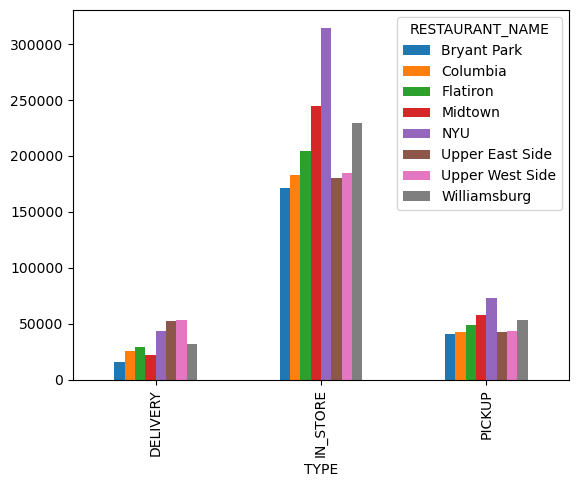

In [72]:
df_orders.groupby(['RESTAURANT_NAME', 'TYPE']).size().unstack(0).plot(kind='bar')

We also talked about the `transpose()` function. Transpose can be applied to **any dataframe**, but in practice, I mostly use it in tandem with unstack. Transpose flips your columns into rows and rows into columns. With a 2-level multi-level index, its the same as using the arguments of the `unstack()` function - look at the examples below.

First - unstack.
Then - unstack, but the 0th index
Finally - unstack, 0th column, and transpose - leaving us right where we started with the base unstack.

In [73]:
df_orders.groupby(['RESTAURANT_NAME', 'TYPE']).size().unstack()

TYPE,DELIVERY,IN_STORE,PICKUP
RESTAURANT_NAME,,,
Bryant Park,15613,171494,40338
Columbia,25247,182603,42960
Flatiron,28859,204607,48517
Midtown,22380,244980,57905
NYU,43310,314832,72718
Upper East Side,52080,180605,42316
Upper West Side,53337,184588,43261
Williamsburg,31822,229427,53425


In [74]:
df_orders.groupby(['RESTAURANT_NAME', 'TYPE']).size().unstack(0)

RESTAURANT_NAME,Bryant Park,Columbia,Flatiron,Midtown,NYU,Upper East Side,Upper West Side,Williamsburg
TYPE,,,,,,,,
DELIVERY,15613,25247,28859,22380,43310,52080,53337,31822
IN_STORE,171494,182603,204607,244980,314832,180605,184588,229427
PICKUP,40338,42960,48517,57905,72718,42316,43261,53425


In [75]:
df_orders.groupby(['RESTAURANT_NAME', 'TYPE']).size().unstack(0).transpose()

TYPE,DELIVERY,IN_STORE,PICKUP
RESTAURANT_NAME,,,
Bryant Park,15613,171494,40338
Columbia,25247,182603,42960
Flatiron,28859,204607,48517
Midtown,22380,244980,57905
NYU,43310,314832,72718
Upper East Side,52080,180605,42316
Upper West Side,53337,184588,43261
Williamsburg,31822,229427,53425


## Calculations on Logical Columns

We've seen how to create a column from a series. If we create a column, we know that we can group by it.

In [76]:
df_orders['HAS_DRINK'] = (df_orders.DRINKS > 0)

In [77]:
df_orders.groupby('HAS_DRINK').COOKIES.mean()

HAS_DRINK
False    0.259543
True     0.258149
Name: COOKIES, dtype: float64

However, we can actually just pass the `groupby` function the logical statement directly - there's no need to create the column. Let's drop the column and demonstrate.

In [79]:
df_orders = df_orders.drop(columns='HAS_DRINK')

In [80]:
df_orders.groupby(  df_orders.DRINKS > 0 ).COOKIES.mean()

DRINKS
False    0.259543
True     0.258149
Name: COOKIES, dtype: float64

## Calculations on Multiple Columns

We then discussed how we could do calculations on multiple columns. First, we talked about selecting multiple columns to do the same aggregation - in this case, group by restaurant, and get the mean of both the drinks and cookies.

In [121]:
df_orders.groupby('RESTAURANT_NAME')[ ['DRINKS','COOKIES'] ].mean()


,DRINKS,COOKIES
RESTAURANT_NAME,,
Bryant Park,0.098138,0.261294
Columbia,0.066572,0.259049
Flatiron,0.097637,0.259161
Midtown,0.126128,0.260683
NYU,0.075769,0.258898
Upper East Side,0.118145,0.257603
Upper West Side,0.097032,0.260475
Williamsburg,0.096446,0.258750


Let's break down what we did there - we took df_orders, grouped by a single column (RESTAURANT_NAME), then selected a list of columns using both the `[]` selector syntax and the list of columns (which we can pass inside of another set of `[]`), and then used the `.mean()` function.

We can also do different types of aggregations across columns - one column could be an average and one could be a count.

We can do this with the `.agg()` function - agg for aggregation. In this function, we can pass it our explicit aggregations - define a column, and the aggregation that it is equal to. The aggregation definition needs a column and a function.

Below, for example, we create, inside of the `agg` function, a new column called `AVG_DRINKS`, that is defined by the `DRINKS` column with the `mean` aggregation applied to it.

In [82]:
df_orders.groupby('RESTAURANT_NAME').agg(
    AVG_DRINKS = ('DRINKS', 'mean'),
    MAIN_COUNT = ('MAIN' , 'count')
)

,AVG_DRINKS,MAIN_COUNT
RESTAURANT_NAME,,
Bryant Park,0.098138,216767
Columbia,0.066572,239406
Flatiron,0.097637,268909
Midtown,0.126128,309502
NYU,0.075769,411253
Upper East Side,0.118145,261957
Upper West Side,0.097032,268023
Williamsburg,0.096446,299822


Finally, I showed that we could do the same thing as our first multiple column example using the agg function.

In [122]:
df_orders.groupby('RESTAURANT_NAME').agg(
    AVG_DRINKS = ('DRINKS', 'mean'),
    AVG_COOKIES = ('COOKIES' , 'mean')
)

### THIS IS THE SAME AS df_orders.groupby('RESTAURANT_NAME')[ ['DRINKS','COOKIES'] ].mean()

,AVG_DRINKS,AVG_COOKIES
RESTAURANT_NAME,,
Bryant Park,0.098138,0.261294
Columbia,0.066572,0.259049
Flatiron,0.097637,0.259161
Midtown,0.126128,0.260683
NYU,0.075769,0.258898
Upper East Side,0.118145,0.257603
Upper West Side,0.097032,0.260475
Williamsburg,0.096446,0.258750


In the context of our madlib - what we're really doing in the agg function is making **a list of columns that we are setting equal to a pair of a column and a mathetical operation**.

So our approach for this would be:
- your dataframe
- bucketed by some columns (passed to the groupby function
- the agg function
    - a list of columns you want to create, each with...
        - the column you want to do an operation to
        - the operation you want to do

## Grouping Using Dates and Times

Remember - we have a datetime column in df_orders.

Pandas has a function called resample() that works like groupby and lets you group by periods of time, but it only works if the datetime column is the index of the dataframe. 

In class, we did this over a few steps in one cell. Here, I'll break it out piece by piece.

In [123]:
# first, we set the index to the datetime column
df_orders.set_index('DATETIME')

,ORDER_ID,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME,IS_DELIVERY
DATETIME,,,,,,,,,,,,,,,
2018-10-11 17:25:50,O1820060,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown,NaN,NaN,NaN,NaN,False
2018-05-31 11:35:00,O1011112,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park,NaN,NaN,NaN,NaN,False
2018-04-21 18:12:57,O752854,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia,Charred Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Green Goddess Beans with Sesame,True
2018-11-17 12:50:52,O2076864,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron,Charred Chicken Marketbowl,Classic Brown Rice,Jasper Hill Mac & Cheese,Cashew Kale Caesar,False
2018-11-04 18:37:24,O1988898,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Jasper Hill Mac & Cheese,Jasper Hill Mac & Cheese,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-04 17:59:51,O420721,R10004,IN_STORE,0.0,2.0,I3,I5,I15,I12,NYU,Herb Roasted Chicken Marketbowl,Classic Brown Rice,Snap Peas,Cashew Kale Caesar,False
2018-09-29 13:05:36,O1738792,R10007,PICKUP,0.0,0.0,I1,I5,I15,I15,Upper West Side,Spicy Meatballs Marketbowl,Classic Brown Rice,Snap Peas,Snap Peas,False
2018-05-07 18:23:24,O858342,R10006,DELIVERY,0.0,0.0,I2,I6,I9,I8,Upper East Side,Grilled Organic Tofu Marketbowl,Farm Greens with Mint,Jasper Hill Mac & Cheese,Cauliflower with Garlic and Parmesan,True


Now we can use resample() to group these into periods of time, such as days, and calculate the mean of the drinks column

In [125]:
# then, we use the resample function
# we can pass it 'D', 'W', 'M', or 'Y' - day, week, month, year
df_orders.set_index('DATETIME').resample('D')

# it will give us this resample object - similar to the grouped object from groupby

In [127]:
# from there, it's quite similar to groupby
# select a column, and select an aggregation
df_orders.set_index('DATETIME').resample('D').DRINKS.mean()

DATETIME
2018-01-01    0.064363
2018-01-02    0.083897
2018-01-03    0.069347
2018-01-04    0.076179
2018-01-05    0.080892
                ...   
2018-12-27    0.068607
2018-12-28    0.080403
2018-12-29    0.067626
2018-12-30    0.071961
2018-12-31    0.076688
Freq: D, Name: DRINKS, Length: 365, dtype: float64

<Axes: xlabel='DATETIME'>

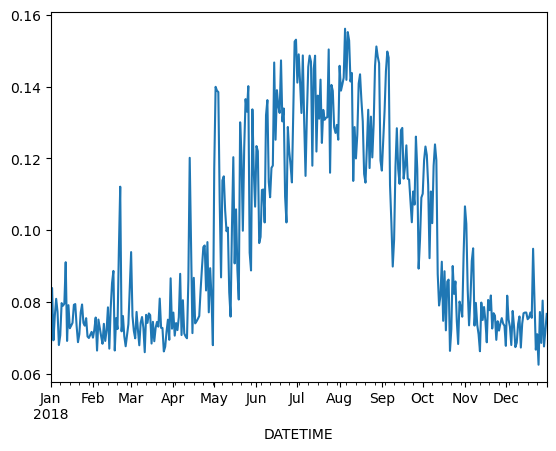

In [129]:
# and finally, chain a plot
df_orders.set_index('DATETIME').resample('D').DRINKS.mean().plot()

### Resampling and Business Problems

Let's solve a business problem - what if I wanted to see the seasonality of orders at the Columbia store?

<Axes: xlabel='DATETIME'>

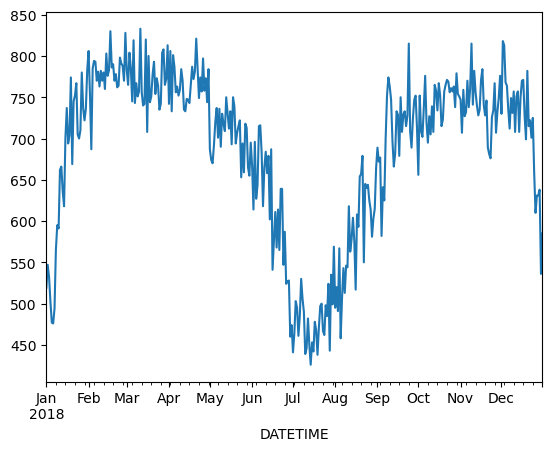

In [89]:
# TOTAL ORDERS PER DAY AT COLUMBIA

# PSEUDOCODE: filter for just columbia orders, resample by day, and get total orders

(df_orders[df_orders.RESTAURANT_NAME == 'Columbia']
 .set_index('DATETIME')
 .resample('D')
 .size()
 .plot()
)

That looks a little jagged. We tried a few methods to make it better.

- Resampling by week gave us too few data points - only 52.

We then introduced rolling averages with the `.rolling(n)` function, allowing us to average the past n windows (depending on our resampling window). 

We could take a rolling sum, a rolling count, or other aggregations. Let's do a rolling average - the most comming - over a 3 period span.

This helped! We tuned this a bit and found resampling by day, with a rolling 14 day average, gave us a decent picture.

Let's break down what is happening here.

Again - this was one cell in class, but I've separated it out so you can see how we got to our end result.


In [131]:
# TOTAL ORDERS PER DAY AT COLUMBIA

# We added .rolling(3), which gives us a rolling 3-day window.
# We then used .mean(), since we want the average over that window.
# We're still using size - the # of rows in df_orders
(df_orders[df_orders.RESTAURANT_NAME == 'Columbia']
 .set_index('DATETIME')
 .resample('D')
 .size()
 .rolling(3)
 .mean()
)

# Note that the first 2 data points are empty - hard to take a rolling 3 day average on day 1 and 2.

DATETIME
2018-01-01           NaN
2018-01-02           NaN
2018-01-03    532.666667
2018-01-04    527.000000
2018-01-05    503.666667
                 ...    
2018-12-27    633.333333
2018-12-28    624.000000
2018-12-29    633.333333
2018-12-30    601.666667
2018-12-31    586.333333
Freq: D, Length: 365, dtype: float64

<Axes: xlabel='DATETIME'>

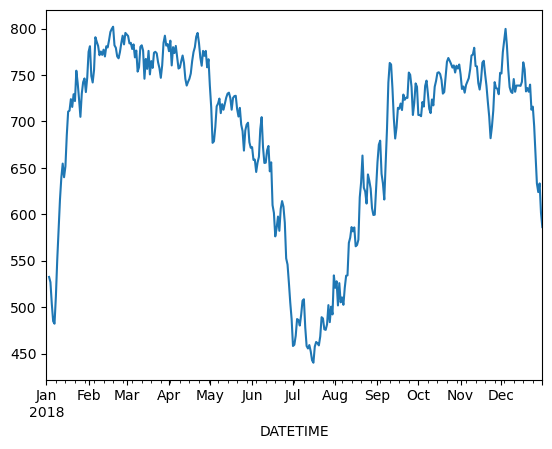

In [134]:
# TOTAL ORDERS PER DAY AT COLUMBIA

# We took the above and added a "plot" - but it still looks jagged. 
# Let's make our window bigger.

(df_orders[df_orders.RESTAURANT_NAME == 'Columbia']
 .set_index('DATETIME')
 .resample('D')
 .size()
 .rolling(3)
 .mean()
 .plot()
)

<Axes: xlabel='DATETIME'>

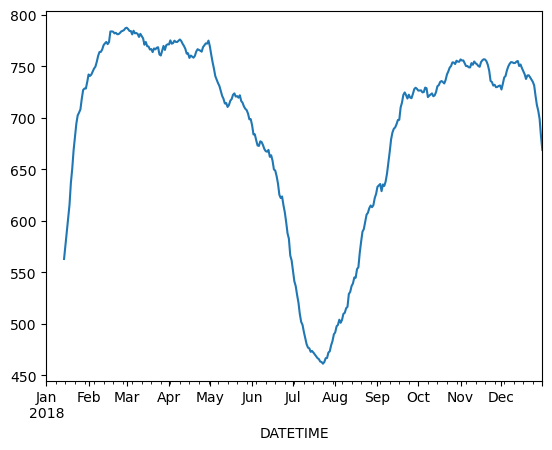

In [135]:
# TOTAL ORDERS PER DAY AT COLUMBIA
(df_orders[df_orders.RESTAURANT_NAME == 'Columbia']
 .set_index('DATETIME')
 .resample('D')
 .size()
 .rolling(14)
 .mean()
 .plot()
)


Oh boy! Definitely seasonal, and lines up with when we'd expect a campus to be busy and empty.

Let's try doing it without the subset - and with a groupby! What about orders per day, per restaurant?

The order of operations is going to matter here.

* First, we set the index to the datetime - we can't do a resample without it, and we have to do it early. Otherwise, if it's after the grouupby, unless we group by the date (we can't), we wont have a date column to resample.
* Then, we do our groupby - we do it before the resample so that the grouping columns exist. If we resampled first, there wouldn't be a restaurant name column.
* Then, we do our resample - now that we have our buckets, we can resample, inside of each bucket, by day.
* Then we apply the size function.
* Then unstack our index to make it chartable
* Then we plot it.

In class, I didn't do a rolling average. Here, though, I will - in the cell below this one.

<Axes: xlabel='DATETIME'>

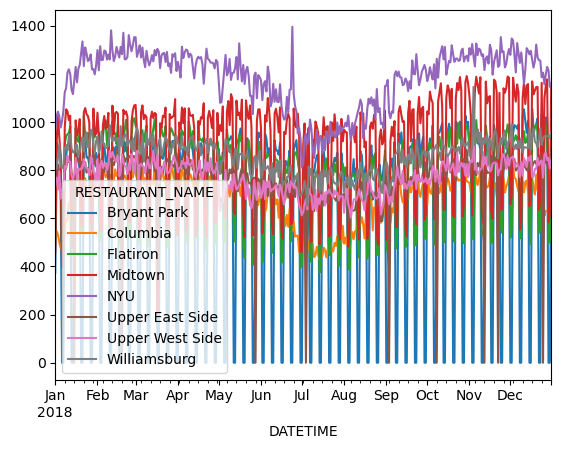

In [136]:
# TOTAL ORDERS PER RESTAURANT PER DAY - NO ROLLING AVERAGE
(df_orders
 .set_index('DATETIME')
 .groupby('RESTAURANT_NAME')
 .resample('D')
 .size()
 .unstack(0)
 .plot()
)

<Axes: xlabel='DATETIME'>

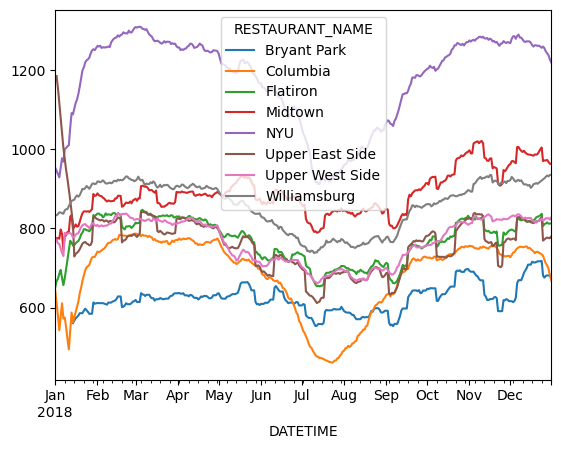

In [138]:
# TOTAL ORDERS PER RESTAURANT PER DAY - ROLLING AVERAGE
(df_orders
 .set_index('DATETIME')
 .groupby('RESTAURANT_NAME')
 .resample('D')
 .size()
 .rolling(14)
 .mean()
 .unstack(0)
 .plot()
)

# Ok - a little prettier! We see that NYU and Columbia have the most obvously seasonal order volume.

# Constructing df_summarized_orders from scratch

Use the Orders data set to recreate the Summarized Orders dataset. We'll want to aggregate all the orders by day and by restaurant.

Let's first create a DataFrame with the number of orders on each day at every restaurant.

In [99]:
df_num_orders = (df_orders.set_index('DATETIME')
                          .groupby('RESTAURANT_NAME')
                          .resample('D')
                          .size()
                          .rename('NUM_ORDERS')
                          .reset_index())

In [100]:
df_num_orders.head()

,RESTAURANT_NAME,DATETIME,NUM_ORDERS
0,Bryant Park,2018-01-01,373
1,Bryant Park,2018-01-02,789
2,Bryant Park,2018-01-03,818
3,Bryant Park,2018-01-04,782
4,Bryant Park,2018-01-05,719


The result is a DataFrame that contains one row for every day at every restaurant.

Next let's create a DataFrame that contains the percentage of orders at each restaurant that are delivery orders.

In [101]:
df_orders['IS_DELIVERY'] = df_orders.TYPE == 'DELIVERY'

In [102]:
df_pct_delivery = (df_orders.set_index('DATETIME')
                            .groupby('RESTAURANT_NAME')
                            .resample('D')
                            .IS_DELIVERY
                            .mean()
                            .reset_index()
                            .rename(columns={'IS_DELIVERY':'PCT_DELIVERY'}))

In [104]:
df_pct_delivery.tail()

,RESTAURANT_NAME,DATETIME,PCT_DELIVERY
2914,Williamsburg,2018-12-27,0.089267
2915,Williamsburg,2018-12-28,0.127524
2916,Williamsburg,2018-12-29,0.093418
2917,Williamsburg,2018-12-30,0.114684
2918,Williamsburg,2018-12-31,0.114943


Finally, we join these datasets together.

We use an outer join just to check to make sure that the rows of the original two tables match.

In [105]:
df_summarized_orders = pd.merge(df_num_orders,
                                df_pct_delivery,
                                on=['RESTAURANT_NAME', 'DATETIME'],
                                how='outer')

In [106]:
df_summarized_orders

,RESTAURANT_NAME,DATETIME,NUM_ORDERS,PCT_DELIVERY
0,Bryant Park,2018-01-01,373,0.000000
1,Bryant Park,2018-01-02,789,0.000000
2,Bryant Park,2018-01-03,818,0.000000
3,Bryant Park,2018-01-04,782,0.000000
4,Bryant Park,2018-01-05,719,0.000000
...,...,...,...,...
2914,Williamsburg,2018-12-27,941,0.089267
2915,Williamsburg,2018-12-28,941,0.127524
2916,Williamsburg,2018-12-29,942,0.093418
2917,Williamsburg,2018-12-30,933,0.114684


The original summarized order DataFrame we used had only 2,806 rows, so why do we have 2,919? The original DataFrame did not include days where there were no orders.

We can filter down this DataFrame to only days in which there were no orders.

However, as we've seen, it's actually useful to have a fuller dataset where we can be explicit about how we handle our volume. I'm going to leave this like this for now.

# THINGS WE DIDN'T COVER IN CLASS

## Pct Change

We didn't cover this in class, but we can also look at the percent change between periods as opposed to the actual value. This is often useful in financial data.

This is done by adding the .pct_change() function after your aggregation - after all, you need to aggregate and get your values before you can find the percent change between them.

In [142]:
(df_orders.set_index('DATETIME')
          .resample('W')
          .size()
          .pct_change()).head()


DATETIME
2018-01-07         NaN
2018-01-14    0.169247
2018-01-21   -0.022101
2018-01-28    0.069302
2018-02-04   -0.014950
Freq: W-SUN, dtype: float64

Here is an example of how we might add a new column, called `pct_change`, to a view of weekly orders.

In [162]:
df_weekly_orders = (df_orders.set_index('DATETIME')
                             .resample('W')
                             .size()
                             .rename('orders') # this is a bit fancy - we're renaming the series
                                               # the 'size' aggregation gives us a series as output
                                               # I'm renaming that series, and *THEN* resetting index
                             .reset_index()
                   )

df_weekly_orders['pct_change'] = df_weekly_orders['orders'].pct_change()

df_weekly_orders.head()

,DATETIME,orders,pct_change
0,2018-01-07,39664,NaN
1,2018-01-14,46377,0.169247
2,2018-01-21,45352,-0.022101
3,2018-01-28,48495,0.069302
4,2018-02-04,47770,-0.014950


## Statistical Analysis

As a bonus for scrolling, here is a way that we can bring in some more advanced statistical analysis using the Seaborn and Statsmodels libraries.

In [164]:
import seaborn as sns

First, let's use Seaborn's pairplot to compare the values in our dataframe and see how they might relate to each other. This is our exploratory analysis.


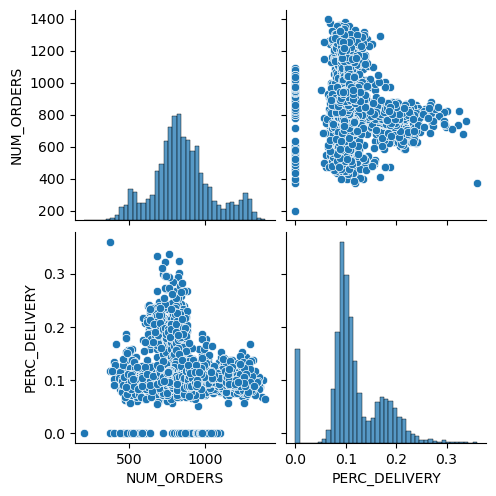

In [165]:
sns.pairplot(df_summarized_orders)

This should look familiar - it's jointly plotting the distribution, and those are histograms.

It looks like there might be a relationship - let's use `lmplot`, which gives us a scatterplot with a regression line of best fit.

Here, I give it my x and y variable, and scatter_kws is an object I can give a dictionary of params to. Here, I just gave it an alpha to help with visualizaton. I could also have given it other things around the thickness of the line or the size of the points.

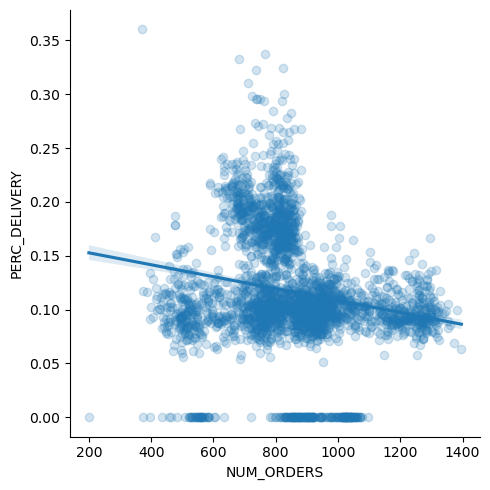

In [169]:
sns.lmplot(data=df_summarized_orders, x='NUM_ORDERS', y='PERC_DELIVERY', scatter_kws={'alpha':0.2})

Ok, there might be something here! Let's see how real the relationship is by running an orderinary least squares model. To do that, we're going to import a library called `statsmodels` - this will give us more advanced statistical tools (think regressions as opposed to plotting).

Finally, let's use this new library. I invite you to look at the documentation to see how to interact with it fully.

The short version is that we explicitly set an x variable (# of orders), give that x variable a constant (think about this as the `b` in the slope of a line `y=mx + b` - it's adding a constant term to our values), tell it what our y variable is, and run the model.

FillNA in this case is handling places where we have no percent delivery - there were no orders that matched, so our value is 0.

Finally, we get the results by fitting the model, and print the results.

In [173]:
import statsmodels.api as sm

In [174]:
x = df_summarized_orders.NUM_ORDERS
x = sm.add_constant(x)
y = df_summarized_orders.PERC_DELIVERY.fillna(0)
model = sm.OLS(y, x, missing='raise')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PERC_DELIVERY   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     112.8
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           7.26e-26
Time:                        01:29:57   Log-Likelihood:                 4208.9
No. Observations:                2806   AIC:                            -8414.
Df Residuals:                    2804   BIC:                            -8402.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1638      0.005     35.979      0.000       0.155       0.173
NUM_ORDERS -5.541e-05   5.22e-06    -10.622      0.000   -6.56e-05   -4.52e-05
==============================================================================
Omnibus:                       48.599   Durbin-Watson:                   0.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.225
Skew:                           0.116   Prob(JB):                     3.12e-19
Kurtosis:                       3.822   Cond. No.                     3.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Judging by the r-squared value, this isn't a very strong relationship. I wonder what data you'll be able to use this with that might have a stronger one!